# Analysis of Stochastic Processes
https://www.astroml.org/astroML-notebooks/chapter10/astroml_chapter10_Analysis_of_Stochastic_Processes.html#

## import functions

In [1]:
import numpy as np

In [2]:
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

In [3]:
from astroML.plotting import setup_text_plots
setup_text_plots(usetex=True)

In [4]:
# https://stackoverflow.com/questions/58121461/runtimeerror-failed-to-process-string-with-tex-because-latex-could-not-be-found
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

%matplotlib inline
from matplotlib import pyplot as plt

## Examples of stochastic processes: 1/𝑓 and 1/𝑓2 processes

In [5]:
N = 1024
dt = 0.01
factor = 100

t = dt * np.arange(N)
random_state = np.random.RandomState(1)

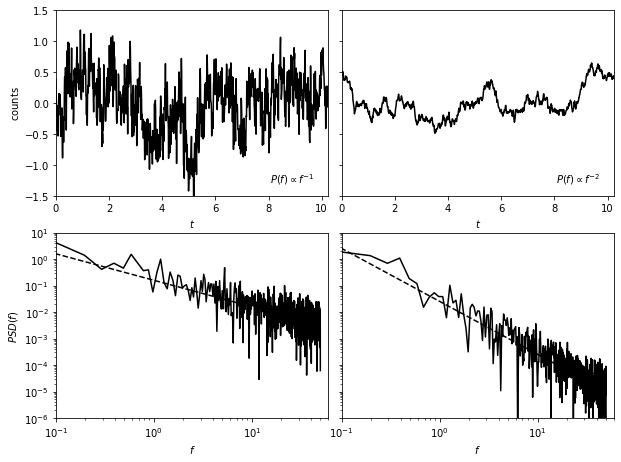

In [6]:
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(wspace=0.05)

for i, beta in enumerate([1.0, 2.0]):
    # Generate the light curve and compute the PSD
    x = factor * generate_power_law(N, dt, beta, random_state=random_state)
    f, PSD = PSD_continuous(t, x)

    # First axes: plot the time series
    ax1 = fig.add_subplot(221 + i)
    ax1.plot(t, x, '-k')

    ax1.text(0.95, 0.05, r"$P(f) \propto f^{-%i}$" % beta,
             ha='right', va='bottom', transform=ax1.transAxes)

    ax1.set_xlim(0, 10.24)
    ax1.set_ylim(-1.5, 1.5)

    ax1.set_xlabel(r'$t$')

    # Second axes: plot the PSD
    ax2 = fig.add_subplot(223 + i, xscale='log', yscale='log')
    ax2.plot(f, PSD, '-k')
    ax2.plot(f[1:], (factor * dt) ** 2 * (2 * np.pi * f[1:]) ** -beta, '--k')

    ax2.set_xlim(1E-1, 60)
    ax2.set_ylim(1E-6, 1E1)

    ax2.set_xlabel(r'$f$')

    if i == 1:
        ax1.yaxis.set_major_formatter(plt.NullFormatter())
        ax2.yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_ylabel(r'${\rm counts}$')
        ax2.set_ylabel(r'$PSD(f)$')

## Edelson and Krolik’s DCF method and the Scargle method Demonstration

In [7]:
t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

np.random.seed(6)
y = generate_damped_RW(t, tau=tau, z=z, xmean=20)

# randomly sample 100 of these
ind = np.arange(len(t))
np.random.shuffle(ind)
ind = ind[:100]
ind.sort()
t = t[ind]
y = y[ind]

# add errors
dy = 0.1
y_obs = np.random.normal(y, dy)


In [8]:
C_S, t_S = ACF_scargle(t, y_obs, dy,
                       n_omega=2. ** 12, omega_max=np.pi / 5.0)

ind = (t_S >= 0) & (t_S <= 500)
t_S = t_S[ind]
C_S = C_S[ind]

        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


In [9]:
C_EK, C_EK_err, bins = ACF_EK(t, y_obs, dy, bins=np.linspace(0, 500, 51))
t_EK = 0.5 * (bins[1:] + bins[:-1])

Text(0, 0.5, 'ACF(t)')

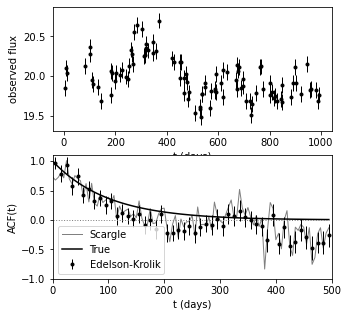

In [10]:
# Plot the results
fig = plt.figure(figsize=(5, 5))

# plot the input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1)
ax.set_xlabel('t (days)')
ax.set_ylabel('observed flux')

# plot the ACF
ax = fig.add_subplot(212)
ax.plot(t_S, C_S, '-', c='gray', lw=1,
        label='Scargle')
ax.errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1,
            label='Edelson-Krolik')
ax.plot(t_S, np.exp(-abs(t_S) / tau_obs), '-k', label='True')
ax.legend(loc=3)

ax.plot(t_S, 0 * t_S, ':', lw=1, c='gray')

ax.set_xlim(0, 500)
ax.set_ylim(-1.0, 1.1)

ax.set_xlabel('t (days)')
ax.set_ylabel('ACF(t)')